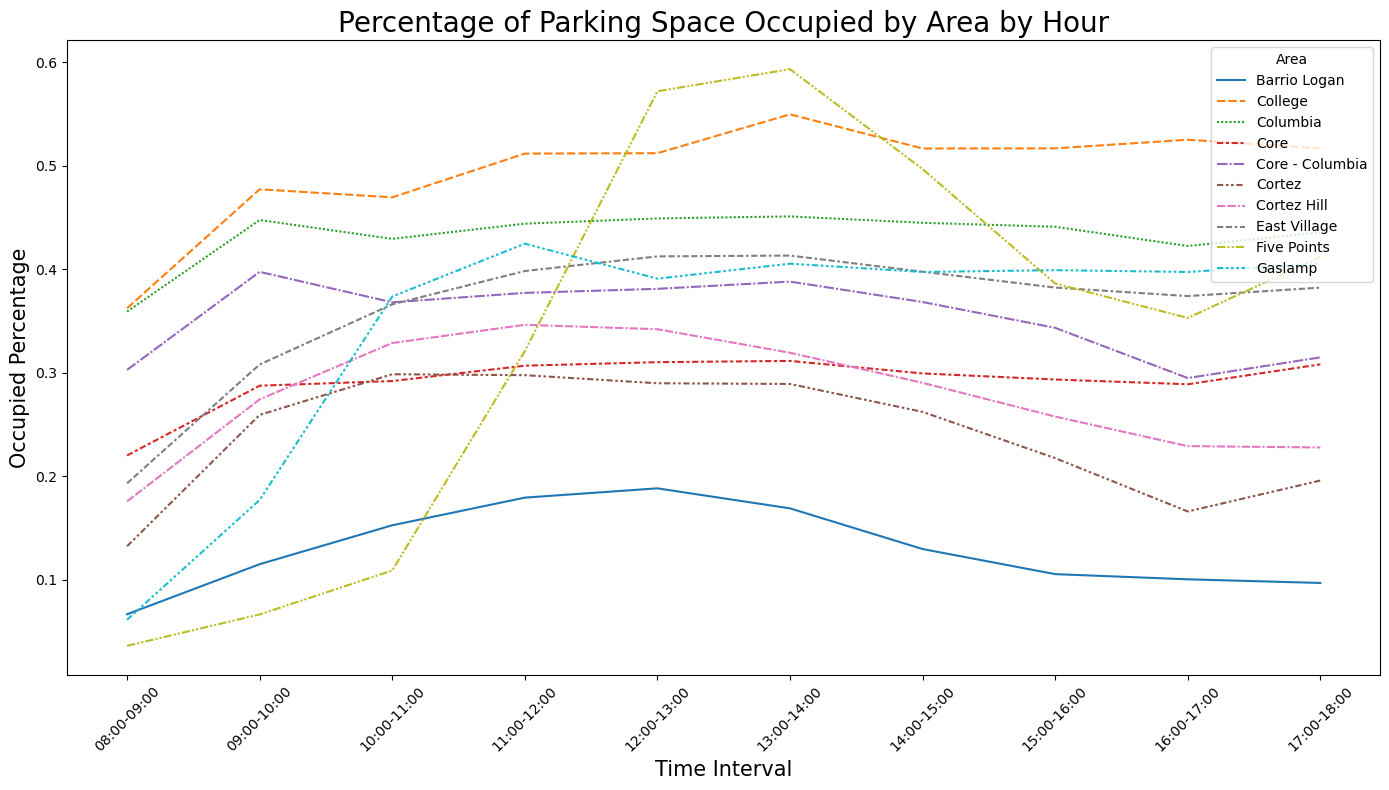

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# read files

df = pd.read_csv('parking_time_by_hours_per_area.csv')

start_time = pd.Timestamp("08:00:00")
end_time = pd.Timestamp("18:00:00")
interval = pd.Timedelta(hours=1)
time_slots = pd.date_range(start=start_time, end=end_time, freq=interval)
# Create list of hour slots in the specified format
hour_slots = [f'{start.strftime("%H:%M")}-{(start + interval).strftime("%H:%M")}' for start in time_slots]
hour_slots

for i in hour_slots:
    df[i]=df[i]/df['pole_id']/312/60

df=df.drop(columns=['time_period_min','18:00-19:00','pole_id'])
tmp_df=df.iloc[1:11,:]


tmp_df.set_index('area', inplace=True)
plt.figure(figsize=(14, 8))
sns.lineplot(data=tmp_df.T)  # Transpose the DataFrame so columns become x-axis values
plt.title('Percentage of Parking Space Occupied by Area by Hour',fontsize=20)
plt.ylabel('Occupied Percentage',fontsize=15)
plt.xlabel('Time Interval',fontsize=15)
plt.xticks(rotation=45)  # Rotate the x labels for better readability
plt.tight_layout()  # Adjust the plot layout
plt.legend(title='Area',loc='upper right')
plt.show()